In [1]:
%run data_cleaning.ipynb
merged_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date     

,movie_id,start_year,primary_title,original_title,genres,runtime_minutes,director_name,writer_name,actors,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,Profit,Profit:Production Ratio
0,tt0249516,2012,Foodfight!,Foodfight!,"Action,Animation,Comedy",91.0,Lawrence Kasanoff,Sean Catherine Derek,Charlie Sheen,26,2012-12-31,Foodfight!,45000000,0,73706,2012,-44926294,-0.998362
1,tt0359950,2013,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",114.0,None,Steve Conrad,"Ben Stiller, Jon Daly",37,2013-12-25,The Secret Life of Walter Mitty,91000000,58236838,187861183,2013,96861183,1.064409
2,tt0365907,2014,A Walk Among the Tombstones,A Walk Among the Tombstones,"Action,Crime,Drama",114.0,Scott Frank,Lawrence Block,"Liam Neeson, David Harbour, Dan Stevens, Boyd ...",67,2014-09-19,A Walk Among the Tombstones,28000000,26017685,62108587,2014,34108587,1.218164
3,tt0369610,2015,Jurassic World,Jurassic World,"Action,Adventure,Sci-Fi",124.0,Colin Trevorrow,Rick Jaffa,"Chris Pratt, Ty Simpkins",34,2015-06-12,Jurassic World,215000000,652270625,1648854864,2015,1433854864,6.669092
4,tt0376136,2011,The Rum Diary,The Rum Diary,"Comedy,Drama",119.0,Bruce Robinson,Hunter S. Thompson,"Johnny Depp, Giovanni Ribisi, Aaron Eckhart, M...",16,2011-10-28,The Rum Diary,45000000,13109815,21544732,2011,-23455268,-0.521228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,tt8155288,2019,Happy Death Day 2U,Happy Death Day 2U,"Drama,Horror,Mystery",100.0,Christopher Landon,Scott Lobdell,"Israel Broussard, Suraj Sharma, Phi Vu",78,2019-02-13,Happy Death Day 2U,9000000,28051045,64179495,2019,55179495,6.131055
1541,tt8266310,2019,Blinded by the Light,Blinded by the Light,"Biography,Comedy,Drama",117.0,Gurinder Chadha,Sarfraz Manzoor,"Kulvinder Ghir, Aaron Phagura, Viveik Kalra",64,2019-08-14,Blinded by the Light,15000000,0,0,2019,-15000000,-1.000000
1544,tt8632862,2018,Fahrenheit 11/9,Fahrenheit 11/9,Documentary,128.0,Michael Moore,None,None,29,2018-09-21,Fahrenheit 11/9,5000000,6352306,6653715,2018,1653715,0.330743
1545,tt8852552,2010,Icarus,Icarus,Thriller,78.0,Maarten Diederen,Emile Beulen,None,91,2010-02-09,Icarus,6000000,0,0,2010,-6000000,-1.000000


In [2]:
#making time grouping for half hour increments because we can't just regress on time because the relationship would just tell you to either 
#make a 0 minute film or a film that lasts an infinite time. So we have to try to regress on 
merged_df['time_grouping'] = 0
merged_df.loc[(merged_df['runtime_minutes'] > 0) & (merged_df['runtime_minutes'] <= 30), 'time_grouping'] = 1
merged_df.loc[(merged_df['runtime_minutes'] > 30) & (merged_df['runtime_minutes'] <= 60), 'time_grouping'] = 2
merged_df.loc[(merged_df['runtime_minutes'] > 60) & (merged_df['runtime_minutes'] <= 90), 'time_grouping'] = 3
merged_df.loc[(merged_df['runtime_minutes'] > 90) & (merged_df['runtime_minutes'] <= 120), 'time_grouping'] = 4
merged_df.loc[(merged_df['runtime_minutes'] > 120) & (merged_df['runtime_minutes'] <= 150), 'time_grouping'] = 5
merged_df.loc[(merged_df['runtime_minutes'] > 150) & (merged_df['runtime_minutes'] <= 180), 'time_grouping'] = 6
merged_df

,movie_id,start_year,primary_title,original_title,genres,runtime_minutes,director_name,writer_name,actors,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,Profit,Profit:Production Ratio,time_grouping
0,tt0249516,2012,Foodfight!,Foodfight!,"Action,Animation,Comedy",91.0,Lawrence Kasanoff,Sean Catherine Derek,Charlie Sheen,26,2012-12-31,Foodfight!,45000000,0,73706,2012,-44926294,-0.998362,4
1,tt0359950,2013,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",114.0,None,Steve Conrad,"Ben Stiller, Jon Daly",37,2013-12-25,The Secret Life of Walter Mitty,91000000,58236838,187861183,2013,96861183,1.064409,4
2,tt0365907,2014,A Walk Among the Tombstones,A Walk Among the Tombstones,"Action,Crime,Drama",114.0,Scott Frank,Lawrence Block,"Liam Neeson, David Harbour, Dan Stevens, Boyd ...",67,2014-09-19,A Walk Among the Tombstones,28000000,26017685,62108587,2014,34108587,1.218164,4
3,tt0369610,2015,Jurassic World,Jurassic World,"Action,Adventure,Sci-Fi",124.0,Colin Trevorrow,Rick Jaffa,"Chris Pratt, Ty Simpkins",34,2015-06-12,Jurassic World,215000000,652270625,1648854864,2015,1433854864,6.669092,5
4,tt0376136,2011,The Rum Diary,The Rum Diary,"Comedy,Drama",119.0,Bruce Robinson,Hunter S. Thompson,"Johnny Depp, Giovanni Ribisi, Aaron Eckhart, M...",16,2011-10-28,The Rum Diary,45000000,13109815,21544732,2011,-23455268,-0.521228,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,tt8155288,2019,Happy Death Day 2U,Happy Death Day 2U,"Drama,Horror,Mystery",100.0,Christopher Landon,Scott Lobdell,"Israel Broussard, Suraj Sharma, Phi Vu",78,2019-02-13,Happy Death Day 2U,9000000,28051045,64179495,2019,55179495,6.131055,4
1541,tt8266310,2019,Blinded by the Light,Blinded by the Light,"Biography,Comedy,Drama",117.0,Gurinder Chadha,Sarfraz Manzoor,"Kulvinder Ghir, Aaron Phagura, Viveik Kalra",64,2019-08-14,Blinded by the Light,15000000,0,0,2019,-15000000,-1.000000,4
1544,tt8632862,2018,Fahrenheit 11/9,Fahrenheit 11/9,Documentary,128.0,Michael Moore,None,None,29,2018-09-21,Fahrenheit 11/9,5000000,6352306,6653715,2018,1653715,0.330743,5
1545,tt8852552,2010,Icarus,Icarus,Thriller,78.0,Maarten Diederen,Emile Beulen,None,91,2010-02-09,Icarus,6000000,0,0,2010,-6000000,-1.000000,3


In [3]:
import pandas as pd
#converting release date to datetime to a datetime object and making a day of year variable
merged_df['release_date'] = pd.to_datetime(merged_df['release_date'])
merged_df['doy'] = merged_df['release_date'].dt.dayofyear

In [4]:
#making column for season categorical based on day of year
merged_df['season'] = 0
merged_df.loc[(merged_df['doy'] >= 60) & (merged_df['doy'] <= 151), 'season'] = "Spring"
merged_df.loc[(merged_df['doy'] >= 152) & (merged_df['doy'] <= 243), 'season'] = "Summer"
merged_df.loc[(merged_df['doy'] >= 234) & (merged_df['doy'] <= 334), 'season'] = "Fall"
merged_df.loc[(merged_df['doy'] >= 1) & (merged_df['doy'] <= 59), 'season'] = "Winter"
merged_df.loc[(merged_df['doy'] >= 335) & (merged_df['doy'] <= 366), 'season'] = "Winter"
merged_df

,movie_id,start_year,primary_title,original_title,genres,runtime_minutes,director_name,writer_name,actors,id,...,movie,production_budget,domestic_gross,worldwide_gross,year,Profit,Profit:Production Ratio,time_grouping,doy,season
0,tt0249516,2012,Foodfight!,Foodfight!,"Action,Animation,Comedy",91.0,Lawrence Kasanoff,Sean Catherine Derek,Charlie Sheen,26,...,Foodfight!,45000000,0,73706,2012,-44926294,-0.998362,4,366,Winter
1,tt0359950,2013,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",114.0,None,Steve Conrad,"Ben Stiller, Jon Daly",37,...,The Secret Life of Walter Mitty,91000000,58236838,187861183,2013,96861183,1.064409,4,359,Winter
2,tt0365907,2014,A Walk Among the Tombstones,A Walk Among the Tombstones,"Action,Crime,Drama",114.0,Scott Frank,Lawrence Block,"Liam Neeson, David Harbour, Dan Stevens, Boyd ...",67,...,A Walk Among the Tombstones,28000000,26017685,62108587,2014,34108587,1.218164,4,262,Fall
3,tt0369610,2015,Jurassic World,Jurassic World,"Action,Adventure,Sci-Fi",124.0,Colin Trevorrow,Rick Jaffa,"Chris Pratt, Ty Simpkins",34,...,Jurassic World,215000000,652270625,1648854864,2015,1433854864,6.669092,5,163,Summer
4,tt0376136,2011,The Rum Diary,The Rum Diary,"Comedy,Drama",119.0,Bruce Robinson,Hunter S. Thompson,"Johnny Depp, Giovanni Ribisi, Aaron Eckhart, M...",16,...,The Rum Diary,45000000,13109815,21544732,2011,-23455268,-0.521228,4,301,Fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,tt8155288,2019,Happy Death Day 2U,Happy Death Day 2U,"Drama,Horror,Mystery",100.0,Christopher Landon,Scott Lobdell,"Israel Broussard, Suraj Sharma, Phi Vu",78,...,Happy Death Day 2U,9000000,28051045,64179495,2019,55179495,6.131055,4,44,Winter
1541,tt8266310,2019,Blinded by the Light,Blinded by the Light,"Biography,Comedy,Drama",117.0,Gurinder Chadha,Sarfraz Manzoor,"Kulvinder Ghir, Aaron Phagura, Viveik Kalra",64,...,Blinded by the Light,15000000,0,0,2019,-15000000,-1.000000,4,226,Summer
1544,tt8632862,2018,Fahrenheit 11/9,Fahrenheit 11/9,Documentary,128.0,Michael Moore,None,None,29,...,Fahrenheit 11/9,5000000,6352306,6653715,2018,1653715,0.330743,5,264,Fall
1545,tt8852552,2010,Icarus,Icarus,Thriller,78.0,Maarten Diederen,Emile Beulen,None,91,...,Icarus,6000000,0,0,2010,-6000000,-1.000000,3,40,Winter


In [5]:
#making season boolean
s_df= merged_df.copy()
s_df['Spring'] = s_df['season'].apply(lambda x: 1 if x == 'Spring' else 0)
s_df['Summer'] = s_df['season'].apply(lambda x: 1 if x == 'Summer' else 0)
s_df['Fall'] = s_df['season'].apply(lambda x: 1 if x == 'Fall' else 0)
s_df['Winter'] = s_df['season'].apply(lambda x: 1 if x == 'Winter' else 0)
s_df

,movie_id,start_year,primary_title,original_title,genres,runtime_minutes,director_name,writer_name,actors,id,...,year,Profit,Profit:Production Ratio,time_grouping,doy,season,Spring,Summer,Fall,Winter
0,tt0249516,2012,Foodfight!,Foodfight!,"Action,Animation,Comedy",91.0,Lawrence Kasanoff,Sean Catherine Derek,Charlie Sheen,26,...,2012,-44926294,-0.998362,4,366,Winter,0,0,0,1
1,tt0359950,2013,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",114.0,None,Steve Conrad,"Ben Stiller, Jon Daly",37,...,2013,96861183,1.064409,4,359,Winter,0,0,0,1
2,tt0365907,2014,A Walk Among the Tombstones,A Walk Among the Tombstones,"Action,Crime,Drama",114.0,Scott Frank,Lawrence Block,"Liam Neeson, David Harbour, Dan Stevens, Boyd ...",67,...,2014,34108587,1.218164,4,262,Fall,0,0,1,0
3,tt0369610,2015,Jurassic World,Jurassic World,"Action,Adventure,Sci-Fi",124.0,Colin Trevorrow,Rick Jaffa,"Chris Pratt, Ty Simpkins",34,...,2015,1433854864,6.669092,5,163,Summer,0,1,0,0
4,tt0376136,2011,The Rum Diary,The Rum Diary,"Comedy,Drama",119.0,Bruce Robinson,Hunter S. Thompson,"Johnny Depp, Giovanni Ribisi, Aaron Eckhart, M...",16,...,2011,-23455268,-0.521228,4,301,Fall,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,tt8155288,2019,Happy Death Day 2U,Happy Death Day 2U,"Drama,Horror,Mystery",100.0,Christopher Landon,Scott Lobdell,"Israel Broussard, Suraj Sharma, Phi Vu",78,...,2019,55179495,6.131055,4,44,Winter,0,0,0,1
1541,tt8266310,2019,Blinded by the Light,Blinded by the Light,"Biography,Comedy,Drama",117.0,Gurinder Chadha,Sarfraz Manzoor,"Kulvinder Ghir, Aaron Phagura, Viveik Kalra",64,...,2019,-15000000,-1.000000,4,226,Summer,0,1,0,0
1544,tt8632862,2018,Fahrenheit 11/9,Fahrenheit 11/9,Documentary,128.0,Michael Moore,None,None,29,...,2018,1653715,0.330743,5,264,Fall,0,0,1,0
1545,tt8852552,2010,Icarus,Icarus,Thriller,78.0,Maarten Diederen,Emile Beulen,None,91,...,2010,-6000000,-1.000000,3,40,Winter,0,0,0,1


In [6]:
import statsmodels.api as sm
import numpy as np

In [7]:
#using drop first so we dont fall into dummy variable trap and running regression of seasons effect on ppr
list_to_drop_from_reg = ['doy', 'season','Profit:Production Ratio', 'time_grouping', 'movie_id', 'start_year', 'primary_title', 'original_title', 'genres', 'runtime_minutes', 'director_name', 'writer_name', 'actors', 'id', 'release_date', 'movie', 'year', 'Profit', 'production_budget', 'domestic_gross', 'worldwide_gross']
X2 = s_df.drop(columns = list_to_drop_from_reg)
y2 = s_df['Profit:Production Ratio']
X2
X_augmented2 = sm.add_constant(X2)
results2 = sm.OLS(y2, X_augmented2).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Profit:Production Ratio   R-squared:                       0.001
Model:                                 OLS   Adj. R-squared:                 -0.001
Method:                      Least Squares   F-statistic:                    0.4408
Date:                     Fri, 05 Jan 2024   Prob (F-statistic):              0.724
Time:                             14:48:15   Log-Likelihood:                -4485.1
No. Observations:                     1427   AIC:                             8978.
Df Residuals:                         1423   BIC:                             8999.
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9827      0.121     16.447      0.000       1.746       2.219
Spring         0.2246      0.272      0.824      0.410      -0.310       0.759
Summer         0.7205      0.272      2.648      0.008       0.187       1.254
Fall           0.4652      0.234      1.985      0.047       0.005       0.925
Winter         0.5724      0.270      2.120      0.034       0.043       1.102
==============================================================================
Omnibus:                     1885.657   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           442124.981
Skew:                           7.075   Prob(JB):                         0.00
Kurtosis:                      88.063   Cond. No.                     1.44e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.69e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [8]:
#no statistical significance for season not in rejection territory, not going to be used in final notebook

In [9]:
sm.stats.diagnostic.het_goldfeldquandt(y2, X2, drop=0.2)

(1.0946516661738779, 0.15136179070486833, 'increasing')

In [10]:
sm.stats.diagnostic.linear_rainbow(results2)

(0.7126832229654734, 0.9999966987785557)

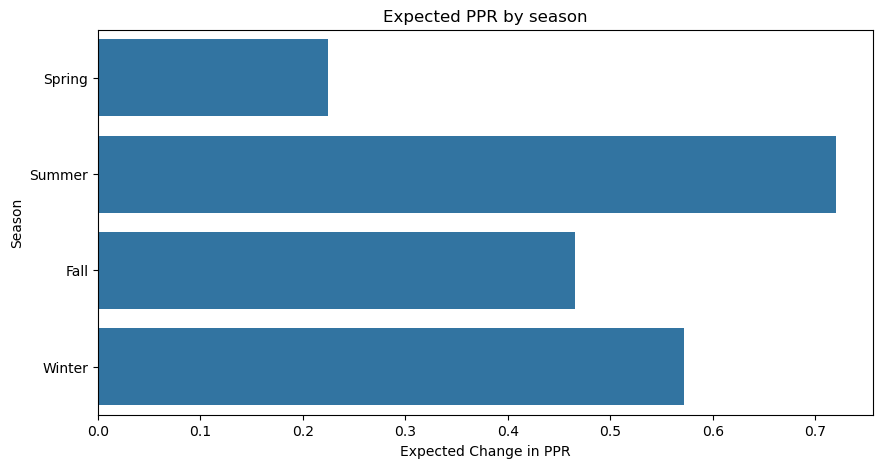

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
weights = results2.params
plt.figure(figsize=(10,5))
sns.barplot(y = weights[1::].index, x = weights[1::].values)
plt.title("Expected PPR by season")
plt.ylabel('Season')
plt.xlabel('Expected Change in PPR')
plt.show()

In [12]:
ppr = merged_df['Profit:Production Ratio']
#for single regression, we created a new variable panda series thats defined
#by the column profit production ratio in the df

In [13]:
time_cat = merged_df['time_grouping']
#for single regression, we created a new variable panda series thats defined
#by the column time grouping in the df

In [14]:
X= sm.add_constant(ppr)
#only add the constant to the column you are regressing on
results= sm.OLS(time_cat, ppr).fit()
results.params
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          time_grouping   R-squared (uncentered):                   0.157
Model:                            OLS   Adj. R-squared (uncentered):              0.157
Method:                 Least Squares   F-statistic:                              266.5
Date:                Fri, 05 Jan 2024   Prob (F-statistic):                    4.66e-55
Time:                        14:48:16   Log-Likelihood:                         -3931.7
No. Observations:                1427   AIC:                                      7865.
Df Residuals:                    1426   BIC:                                      7871.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Profit:Production Ratio     0.2683      0.016     16.325      0.000       0.236       0.300
==============================================================================
Omnibus:                     1697.602   Durbin-Watson:                   0.380
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           278154.818
Skew:                          -5.921   Prob(JB):                         0.00
Kurtosis:                      70.364   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
merged_df['time_grouping'].value_counts()

time_grouping
4    922
5    274
3    185
6     34
2      6
1      6
Name: count, dtype: int64

In [16]:
time_increments = [3, 4, 5, 6]

In [17]:
#making time grouping boolean for regression
x_df= merged_df.copy()
x_df['30 min'] = x_df['time_grouping'].apply(lambda x: 1 if x == 1 else 0)
x_df['1 hour'] = x_df['time_grouping'].apply(lambda x: 1 if x == 2 else 0)
x_df['1.5 hours'] = x_df['time_grouping'].apply(lambda x: 1 if x == 3 else 0)
x_df['2 hours'] = x_df['time_grouping'].apply(lambda x: 1 if x == 4 else 0)
x_df['2.5 hours'] = x_df['time_grouping'].apply(lambda x: 1 if x == 5 else 0)
x_df['3 hours'] = x_df['time_grouping'].apply(lambda x: 1 if x == 6 else 0)
x_df['time_grouping'].value_counts()

time_grouping
4    922
5    274
3    185
6     34
2      6
1      6
Name: count, dtype: int64

In [18]:
#dropped 3 hours becasuse dropping 30 mins or 1 hour would still result in multicolinearity due to their small sample size
list_to_drop_from_reg = ['3 hours', 'doy', 'season','Profit:Production Ratio', 'time_grouping', 'movie_id', 'start_year', 'primary_title', 'original_title', 'genres', 'runtime_minutes', 'director_name', 'writer_name', 'actors', 'id', 'release_date', 'movie', 'year', 'Profit', 'production_budget', 'domestic_gross', 'worldwide_gross']
X = x_df.drop(columns = list_to_drop_from_reg)
y = x_df['Profit:Production Ratio']
X
X_augmented = sm.add_constant(X)
X_augmented
results = sm.OLS(y, X_augmented).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Profit:Production Ratio   R-squared:                       0.004
Model:                                 OLS   Adj. R-squared:                  0.000
Method:                      Least Squares   F-statistic:                     1.097
Date:                     Fri, 05 Jan 2024   Prob (F-statistic):              0.360
Time:                             14:48:16   Log-Likelihood:                -4483.0
No. Observations:                     1427   AIC:                             8978.
Df Residuals:                         1421   BIC:                             9010.
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3055      0.962      3.435      0.001       1.418       5.193
30 min        -1.8976      2.485     -0.764      0.445      -6.771       2.976
1 hour        -2.5473      2.485     -1.025      0.305      -7.421       2.326
1.5 hours     -0.0828      1.047     -0.079      0.937      -2.137       1.971
2 hours       -0.9810      0.980     -1.001      0.317      -2.903       0.941
2.5 hours     -0.8675      1.020     -0.850      0.395      -2.869       1.134
==============================================================================
Omnibus:                     1870.061   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           425593.330
Skew:                           6.974   Prob(JB):                         0.00
Kurtosis:                      86.447   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
sm.stats.diagnostic.het_goldfeldquandt(y, X, drop=0.2)


(1.1111232588864255, 0.11502315589066034, 'increasing')

In [20]:
sm.stats.diagnostic.linear_rainbow(results)


(0.720131615966048, 0.9999936634715543)

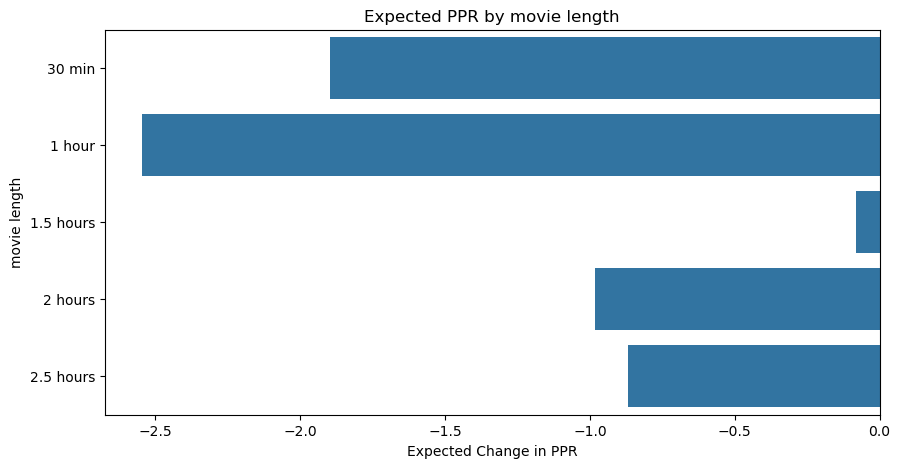

In [21]:
weights = results.params
plt.figure(figsize=(10,5))
sns.barplot(y = weights[1::].index, x = weights[1::].values)
plt.title("Expected PPR by movie length")
plt.ylabel('movie length')
plt.xlabel('Expected Change in PPR')
plt.show()

In [22]:
sak_df_1 = x_df
sak_df_2 = s_df

In [23]:
x_df

,movie_id,start_year,primary_title,original_title,genres,runtime_minutes,director_name,writer_name,actors,id,...,Profit:Production Ratio,time_grouping,doy,season,30 min,1 hour,1.5 hours,2 hours,2.5 hours,3 hours
0,tt0249516,2012,Foodfight!,Foodfight!,"Action,Animation,Comedy",91.0,Lawrence Kasanoff,Sean Catherine Derek,Charlie Sheen,26,...,-0.998362,4,366,Winter,0,0,0,1,0,0
1,tt0359950,2013,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",114.0,None,Steve Conrad,"Ben Stiller, Jon Daly",37,...,1.064409,4,359,Winter,0,0,0,1,0,0
2,tt0365907,2014,A Walk Among the Tombstones,A Walk Among the Tombstones,"Action,Crime,Drama",114.0,Scott Frank,Lawrence Block,"Liam Neeson, David Harbour, Dan Stevens, Boyd ...",67,...,1.218164,4,262,Fall,0,0,0,1,0,0
3,tt0369610,2015,Jurassic World,Jurassic World,"Action,Adventure,Sci-Fi",124.0,Colin Trevorrow,Rick Jaffa,"Chris Pratt, Ty Simpkins",34,...,6.669092,5,163,Summer,0,0,0,0,1,0
4,tt0376136,2011,The Rum Diary,The Rum Diary,"Comedy,Drama",119.0,Bruce Robinson,Hunter S. Thompson,"Johnny Depp, Giovanni Ribisi, Aaron Eckhart, M...",16,...,-0.521228,4,301,Fall,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,tt8155288,2019,Happy Death Day 2U,Happy Death Day 2U,"Drama,Horror,Mystery",100.0,Christopher Landon,Scott Lobdell,"Israel Broussard, Suraj Sharma, Phi Vu",78,...,6.131055,4,44,Winter,0,0,0,1,0,0
1541,tt8266310,2019,Blinded by the Light,Blinded by the Light,"Biography,Comedy,Drama",117.0,Gurinder Chadha,Sarfraz Manzoor,"Kulvinder Ghir, Aaron Phagura, Viveik Kalra",64,...,-1.000000,4,226,Summer,0,0,0,1,0,0
1544,tt8632862,2018,Fahrenheit 11/9,Fahrenheit 11/9,Documentary,128.0,Michael Moore,None,None,29,...,0.330743,5,264,Fall,0,0,0,0,1,0
1545,tt8852552,2010,Icarus,Icarus,Thriller,78.0,Maarten Diederen,Emile Beulen,None,91,...,-1.000000,3,40,Winter,0,0,1,0,0,0


In [24]:
s_df

,movie_id,start_year,primary_title,original_title,genres,runtime_minutes,director_name,writer_name,actors,id,...,year,Profit,Profit:Production Ratio,time_grouping,doy,season,Spring,Summer,Fall,Winter
0,tt0249516,2012,Foodfight!,Foodfight!,"Action,Animation,Comedy",91.0,Lawrence Kasanoff,Sean Catherine Derek,Charlie Sheen,26,...,2012,-44926294,-0.998362,4,366,Winter,0,0,0,1
1,tt0359950,2013,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",114.0,None,Steve Conrad,"Ben Stiller, Jon Daly",37,...,2013,96861183,1.064409,4,359,Winter,0,0,0,1
2,tt0365907,2014,A Walk Among the Tombstones,A Walk Among the Tombstones,"Action,Crime,Drama",114.0,Scott Frank,Lawrence Block,"Liam Neeson, David Harbour, Dan Stevens, Boyd ...",67,...,2014,34108587,1.218164,4,262,Fall,0,0,1,0
3,tt0369610,2015,Jurassic World,Jurassic World,"Action,Adventure,Sci-Fi",124.0,Colin Trevorrow,Rick Jaffa,"Chris Pratt, Ty Simpkins",34,...,2015,1433854864,6.669092,5,163,Summer,0,1,0,0
4,tt0376136,2011,The Rum Diary,The Rum Diary,"Comedy,Drama",119.0,Bruce Robinson,Hunter S. Thompson,"Johnny Depp, Giovanni Ribisi, Aaron Eckhart, M...",16,...,2011,-23455268,-0.521228,4,301,Fall,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,tt8155288,2019,Happy Death Day 2U,Happy Death Day 2U,"Drama,Horror,Mystery",100.0,Christopher Landon,Scott Lobdell,"Israel Broussard, Suraj Sharma, Phi Vu",78,...,2019,55179495,6.131055,4,44,Winter,0,0,0,1
1541,tt8266310,2019,Blinded by the Light,Blinded by the Light,"Biography,Comedy,Drama",117.0,Gurinder Chadha,Sarfraz Manzoor,"Kulvinder Ghir, Aaron Phagura, Viveik Kalra",64,...,2019,-15000000,-1.000000,4,226,Summer,0,1,0,0
1544,tt8632862,2018,Fahrenheit 11/9,Fahrenheit 11/9,Documentary,128.0,Michael Moore,None,None,29,...,2018,1653715,0.330743,5,264,Fall,0,0,1,0
1545,tt8852552,2010,Icarus,Icarus,Thriller,78.0,Maarten Diederen,Emile Beulen,None,91,...,2010,-6000000,-1.000000,3,40,Winter,0,0,0,1
